# Welcome to the hacky Quantum Machine Learning Guide!
Note that a key part of this is being able to get a good idea of what the circuit should look like and to have a decent guess of what exactly it will vaguely look like. To this end, pure python isn't used (as the generated pyplot isn't able to be seen easily), and neither is Q#, so a Jupyter notebook is the most effective way. Plus, markdown is decently nice.

# General Info on Machine Learning and Classification

The $N$ variables that the data stores is referred to as a feature. For example, $(x_1,x_2)$ would have $2$ features. Since a register of $n$ qubits has $2^n$ possible states, it's possible to store $N$ features in $\lceil \log_2(N) \rceil$ qubits.

## Trying the data from the actual round!

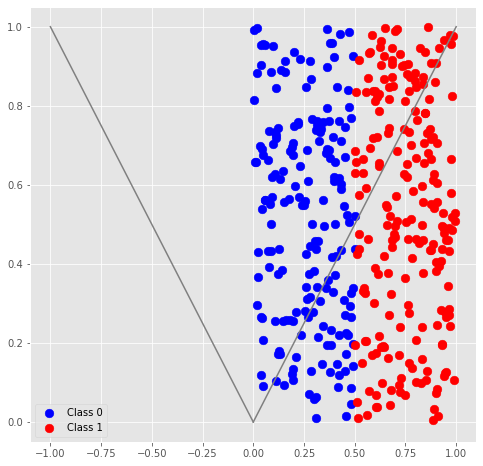

In [2]:
import json
import math
import random
from typing import List

import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# Plotting configuration
cases = [(0, 0), (0, 1), (1, 1), (1, 0)]
markers = [
    '.' if actual == classified else 'X'
    for (actual, classified) in cases
]
colors = ['blue', 'blue', 'red', 'red']

if __name__ == "__main__":
    ################HERE YOU CAN CHANGE BETWEEN DATASETS##################
    with open('training_data3.json') as f:
        training_data = json.load(f)
#Dataset 3 : if x>= .5 it's class 1 otherwise class 0
#Dataset 4 : if abs(y) >= .75 it's class 1, otherwise 0
#Dataset 5 : if r >= .75 class 1
#Dataset 6 : hyperbolic (disconnected - 1)
#Dataset 7 : roughly exponenetial (above - 0)
separation_angles = [ math.pi / 4, 3*math.pi /4]
#dataset 1 - pi/4 - 3pi/4 and 5pi/4 - 7pi/4 = Class 0  
#dataset 2 - 2pi/3 - pi and 5pi/3-2pi = Class 0

def plot_data (features : list, actual_labels : list, classified_labels : list = None, extra_lines : list = None):
    """Plots the data, labeling it with actual labels if there are no classification results provided, 
    and with the classification results (indicating their correctness) if they are provided.
    """
    samples = np.array(features)
    pyplot.figure(figsize=(8, 8))
    for (idx_case, ((actual, classified), marker, color)) in enumerate(zip(cases, markers, colors)):
        mask = np.logical_and(np.equal(actual_labels, actual), 
                              np.equal(actual if classified_labels == None else classified_labels, classified))
        if not np.any(mask): continue
        pyplot.scatter(
            samples[mask, 0], samples[mask, 1],
            label = f"Class {actual}" if classified_labels == None else f"Was {actual}, classified {classified}",
            marker = marker, s = 300, c = [color],
        )
    # Add the lines to show the true classes boundaries, if provided
    if extra_lines != None:
        for line in extra_lines:
            pyplot.plot(line[0], line[1], color = 'gray')
    pyplot.legend()
    
def separation_endpoint (angle : float) -> (float, float):
    if (angle < math.pi / 4):
        return (1, math.tan(angle))
    return (1/math.tan(angle), 1)

# Set up lines that show class separation

separation_lines = list(zip([(0,0), (0,0)], list(map(separation_endpoint, separation_angles))))
extra_lines = []
for line in separation_lines:
    extra_lines.append([[line[0][0], line[1][0]], [line[0][1], line[1][1]]])

plot_data(training_data['Features'], training_data['Labels'],extra_lines = extra_lines)


In [7]:
# Q# configuration and necessary imports
import qsharp
qsharp.packages.add("Microsoft.Quantum.MachineLearning::0.11.2004.2825")
qsharp.reload()
import Problem
print("Done Configuring")

Adding package Microsoft.Quantum.MachineLearning::0.11.2004.2825.

ModuleNotFoundError: No module named 'Problem'

# Warm-up Round Solution
This is the original code that was used in order to solve the warm-up machine learning problems. The following cells were used (in order). Additionally, in order to (slightly) modify the solution from the first to the second problems, the training_set1.json was changed to training_set2.json and nothing else changed (except the guesses). First cell plots data and loads the training set as training_set. Second cell sets it up so that Q# can be used. Third cell imports the code that ends up doing most of the work for the problem (note that the line ```import QTrainModel``` uses the ```namespace QTrainModel``` from ```copypaste.qs``` also the ```ClassifierStructure()``` had to be defined explicitly for this type of circuit). Fourth cell actually gives the solution.

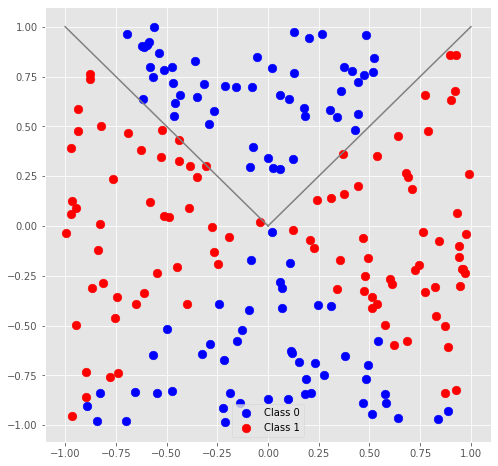

In [1]:
import json
import math
import random
from typing import List

import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# Plotting configuration
cases = [(0, 0), (0, 1), (1, 1), (1, 0)]
markers = [
    '.' if actual == classified else 'X'
    for (actual, classified) in cases
]
colors = ['blue', 'blue', 'red', 'red']

if __name__ == "__main__":
    ################HERE YOU CAN CHANGE BETWEEN DATASETS##################
    with open('training_data1.json') as f:
        training_data = json.load(f)

separation_angles = [ math.pi / 4, 3*math.pi /4]
#dataset 1 - pi/4 - 3pi/4 and 5pi/4 - 7pi/4 = Class 0  
#dataset 2 - 2pi/3 - pi and 5pi/3-2pi = Class 0

def plot_data (features : list, actual_labels : list, classified_labels : list = None, extra_lines : list = None):
    """Plots the data, labeling it with actual labels if there are no classification results provided, 
    and with the classification results (indicating their correctness) if they are provided.
    """
    samples = np.array(features)
    pyplot.figure(figsize=(8, 8))
    for (idx_case, ((actual, classified), marker, color)) in enumerate(zip(cases, markers, colors)):
        mask = np.logical_and(np.equal(actual_labels, actual), 
                              np.equal(actual if classified_labels == None else classified_labels, classified))
        if not np.any(mask): continue
        pyplot.scatter(
            samples[mask, 0], samples[mask, 1],
            label = f"Class {actual}" if classified_labels == None else f"Was {actual}, classified {classified}",
            marker = marker, s = 300, c = [color],
        )
    # Add the lines to show the true classes boundaries, if provided
    if extra_lines != None:
        for line in extra_lines:
            pyplot.plot(line[0], line[1], color = 'gray')
    pyplot.legend()
    
def separation_endpoint (angle : float) -> (float, float):
    if (angle < math.pi / 4):
        return (1, math.tan(angle))
    return (1/math.tan(angle), 1)

# Set up lines that show class separation

separation_lines = list(zip([(0,0), (0,0)], list(map(separation_endpoint, separation_angles))))
extra_lines = []
for line in separation_lines:
    extra_lines.append([[line[0][0], line[1][0]], [line[0][1], line[1][1]]])

plot_data(training_data['Features'], training_data['Labels'],extra_lines = extra_lines)



The cell importing Q# and the cell importing the code are separated due to qsharp.reload() taking a very long time. If things start to go wrong, it's likely that this is the cause. Additionally, all of the code that is in the directory has to be correct and not crash so for a temporary solution, changing all of the broken ones with .txt seems plausible.

In [8]:
# Q# configuration and necessary imports
import qsharp
qsharp.packages.add("Microsoft.Quantum.MachineLearning::0.11.2004.2825")
qsharp.reload()
print("Done Configuring")

Adding package Microsoft.Quantum.MachineLearning::0.11.2004.2825.Done Configuring


In [9]:
import QTrainModel

ModuleNotFoundError: No module named 'QTrainModel'

### Generating the correct solution
The initialParameters should be varied some in order to get a better idea of the solution (and to minimize misses). The first argument of initalParameters seem to be the guess of the rotation, and the second to be the initial bias. A few ideas are to run it with guesses (using binary search), and see to what value it converges to. Using a higher bias would be wise, as it would allow it to converge vaguely and later to fine-tune using a smaller one. However due to the large amount of time that it takes to do this, it would seem wise to avoid doing too much random guessing, and it seems that using a tiny bias would be bad because it would most likely overfit the data.

In [6]:
(parameters, bias) = QTrainModel.TrainLinearlySeparableModel.simulate( #python
    trainingVectors = training_data['Features'],
    trainingLabels = training_data['Labels'],
    initialParameters = [[2.0], [1.0]]
)

Training complete, found optimal parameters: [1.9928000000000008], 0.374780590795909 with 69 misses


In [7]:
(parameters, bias) = QTrainModel.TrainLinearlySeparableModel.simulate( #python
    trainingVectors = training_data['Features'],
    trainingLabels = training_data['Labels'],
    initialParameters = [[1.9928], [2.0]]
)

Training complete, found optimal parameters: [1.9520000000000008], 0.46031430268711826 with 66 misses


In [12]:
import time

In [16]:
start_time = time.time()
(parameters, bias) = QTrainModel.TrainLinearlySeparableModel.simulate( #python
    trainingVectors = training_data['Features'],
    trainingLabels = training_data['Labels'],
    initialParameters = [[3.284], [2.0]]
)
print("--- %s seconds ---" % (time.time() - start_time))

Training complete, found optimal parameters: [3.142249999999999], 0.003599999999999992 with 0 misses
--- 74.82615089416504 seconds ---
